# Pedict Mobile Phone Pricing

## Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')
import missingno as msno
import plotly.graph_objs as go
from plotly.subplots import make_subplots
%matplotlib inline

In [2]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True) # Initialising Plotly for direct use in our Notebook

## Understand the Data|

In [3]:
data = pd.read_csv('dataset.csv')
pd.options.display.max_columns = None
data.sample(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1777,843,0,1.3,1,1,0,16,0.9,119,7,4,593,732,1734,17,8,14,0,0,1,1
1756,1864,0,1.9,1,2,0,57,0.1,181,6,6,1279,1793,3586,19,9,8,0,0,1,3
1963,1906,1,1.9,1,3,0,55,0.2,113,3,4,3,629,1871,13,5,4,1,0,1,1
1077,1569,0,0.8,1,8,0,59,0.9,111,3,16,1261,1383,3672,15,2,15,1,0,1,3
1031,1983,1,0.5,1,3,0,43,1.0,87,6,10,349,676,2775,9,4,3,0,1,1,2
458,664,0,1.2,1,0,0,28,0.9,106,5,5,754,1497,2042,17,15,19,1,1,0,1
1366,1708,0,0.8,0,8,1,14,0.9,197,4,16,263,1345,1247,19,16,16,1,0,0,1
1708,1849,1,0.5,0,1,0,29,0.5,181,7,12,978,1986,3330,14,4,15,1,0,1,3
1177,1031,1,2.1,1,2,1,11,0.1,121,2,9,532,1247,2385,11,7,16,1,0,0,2
173,1577,0,0.5,1,0,1,42,0.3,197,5,4,1045,1737,2060,19,6,12,1,0,0,2


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

 **Conclusions**  
| S.No | Points |
|------|--------|
| 1    | Dataset contains 2000 data points about Mobile Phones. |
| 2    | We have around 21 columns, where 20 are independent variables and 1 is the dependent variable (`price_range`). |
| 3    | From the `info()` function, we observed that there are no null values. |
| 4    | **Numerical Variables**: `battery_power`, `clock_speed`, `fc`, `int_memory`, `m_dep`, `mobile_wt`, `pc`, `px_height`, `px_width`, `ram`, `sc_h`, `sc_w`, `talk_time`. |
| 5     | **Categorical Variables**: `blue`, `dual_sim`, `four_g`, `three_g`, `touch_screen`, `wifi`, `n_cores`, `price_range`. |


## Understand the Categorical Variables

In [8]:
categorical_data = data[['blue','dual_sim','four_g','three_g','touch_screen','wifi','n_cores','price_range']]

unique_counts = categorical_data.nunique()
unique_values = categorical_data.apply(lambda x: x.unique())

pd.DataFrame({'Number of Unique Values':unique_counts,'Unique Values':unique_values})

,Number of Unique Values,Unique Values
blue,2,"[0, 1]"
dual_sim,2,"[0, 1]"
four_g,2,"[0, 1]"
three_g,2,"[0, 1]"
touch_screen,2,"[0, 1]"
wifi,2,"[1, 0]"
n_cores,8,"[2, 3, 5, 6, 1, 8, 4, 7]"
price_range,4,"[1, 2, 3, 0]"


### Univariate Analysis on Categorical Data

In [14]:
fig = make_subplots(rows=3,cols=3,specs=[[{'type':'domain'}]*3]*3,vertical_spacing=0.05, horizontal_spacing=0.02)

In [20]:
for i, features in enumerate(categorical_data.columns):
    value_counts = categorical_data[features].value_counts()

    pie_chart = go.Pie(
        labels = value_counts.index,
        values = value_counts.values,
        hole=0.6,
        textinfo='percent+label',
        textposition='inside',
        title=features,
        marker = {'line':{'color':'white','width':2}}
    )

    row, col = divmod(i,3)
    fig.add_trace(pie_chart,row=row+1,col=col+1)

fig.update_layout(
        title_text = "Distribution of Categorical Variables",
        title_x = 0.5, title_font={'size':26}
    )

fig.show()

 **Conclusions**  
| S.No | Points |
|------|--------|
| 1    | The Target Variable `Price_Range` has balanced data.|
| 2    | No need to perform any Ordinal or Dummy Encoding on these variables.|


## Understand the Numerical Variables

In [13]:
numerical_data = data.drop(categorical_data.columns,axis=1)
numerical_data.describe().T.round(1)

,count,mean,std,min,25%,50%,75%,max
battery_power,2000.0,1238.5,439.4,501.0,851.8,1226.0,1615.2,1998.0
clock_speed,2000.0,1.5,0.8,0.5,0.7,1.5,2.2,3.0
fc,2000.0,4.3,4.3,0.0,1.0,3.0,7.0,19.0
int_memory,2000.0,32.0,18.1,2.0,16.0,32.0,48.0,64.0
m_dep,2000.0,0.5,0.3,0.1,0.2,0.5,0.8,1.0
mobile_wt,2000.0,140.2,35.4,80.0,109.0,141.0,170.0,200.0
pc,2000.0,9.9,6.1,0.0,5.0,10.0,15.0,20.0
px_height,2000.0,645.1,443.8,0.0,282.8,564.0,947.2,1960.0
px_width,2000.0,1251.5,432.2,500.0,874.8,1247.0,1633.0,1998.0
ram,2000.0,2124.2,1084.7,256.0,1207.5,2146.5,3064.5,3998.0


### Univariate Analysis on Numerical Data

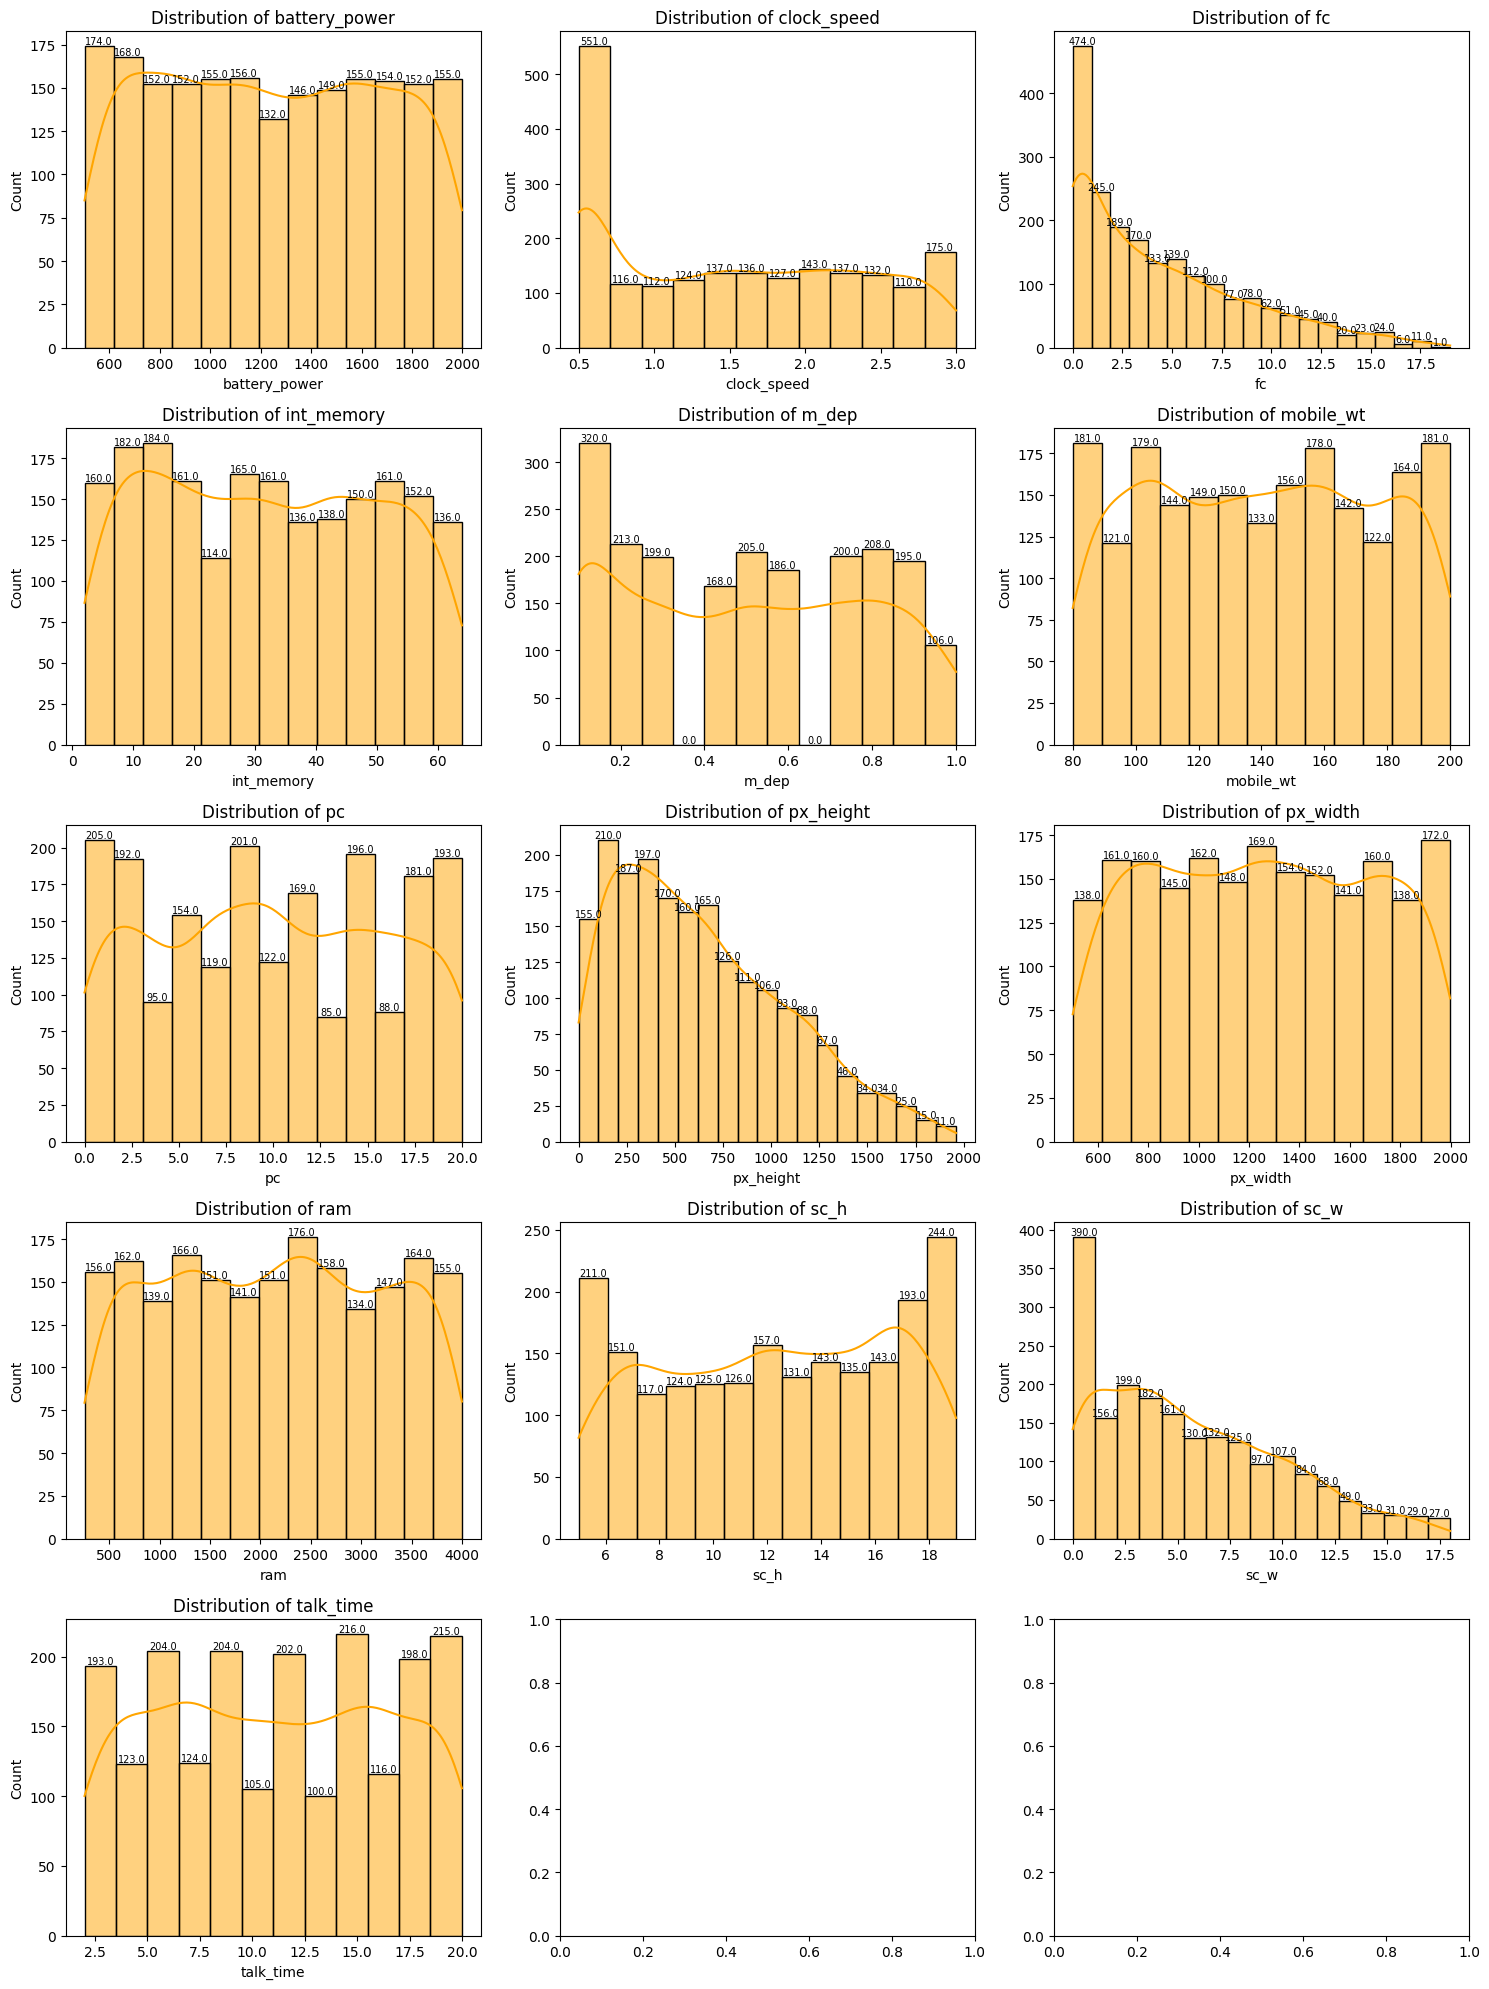

In [53]:
fig, axes = plt.subplots(5,3,figsize=(15,20))
axes = axes.flatten()

for i, features in enumerate(numerical_data.columns):
    histplot = sns.histplot(numerical_data[features],kde=True,ax=axes[i],bins='auto',color='orange')
    axes[i].set_title(f'Distribution of {features}')

    if hasattr(histplot,'containers'):
        for bars in histplot.containers:
            axes[i].bar_label(bars,fmt='%.1f',label_type='edge',fontsize=7,color='black')

plt.tight_layout()
plt.show()

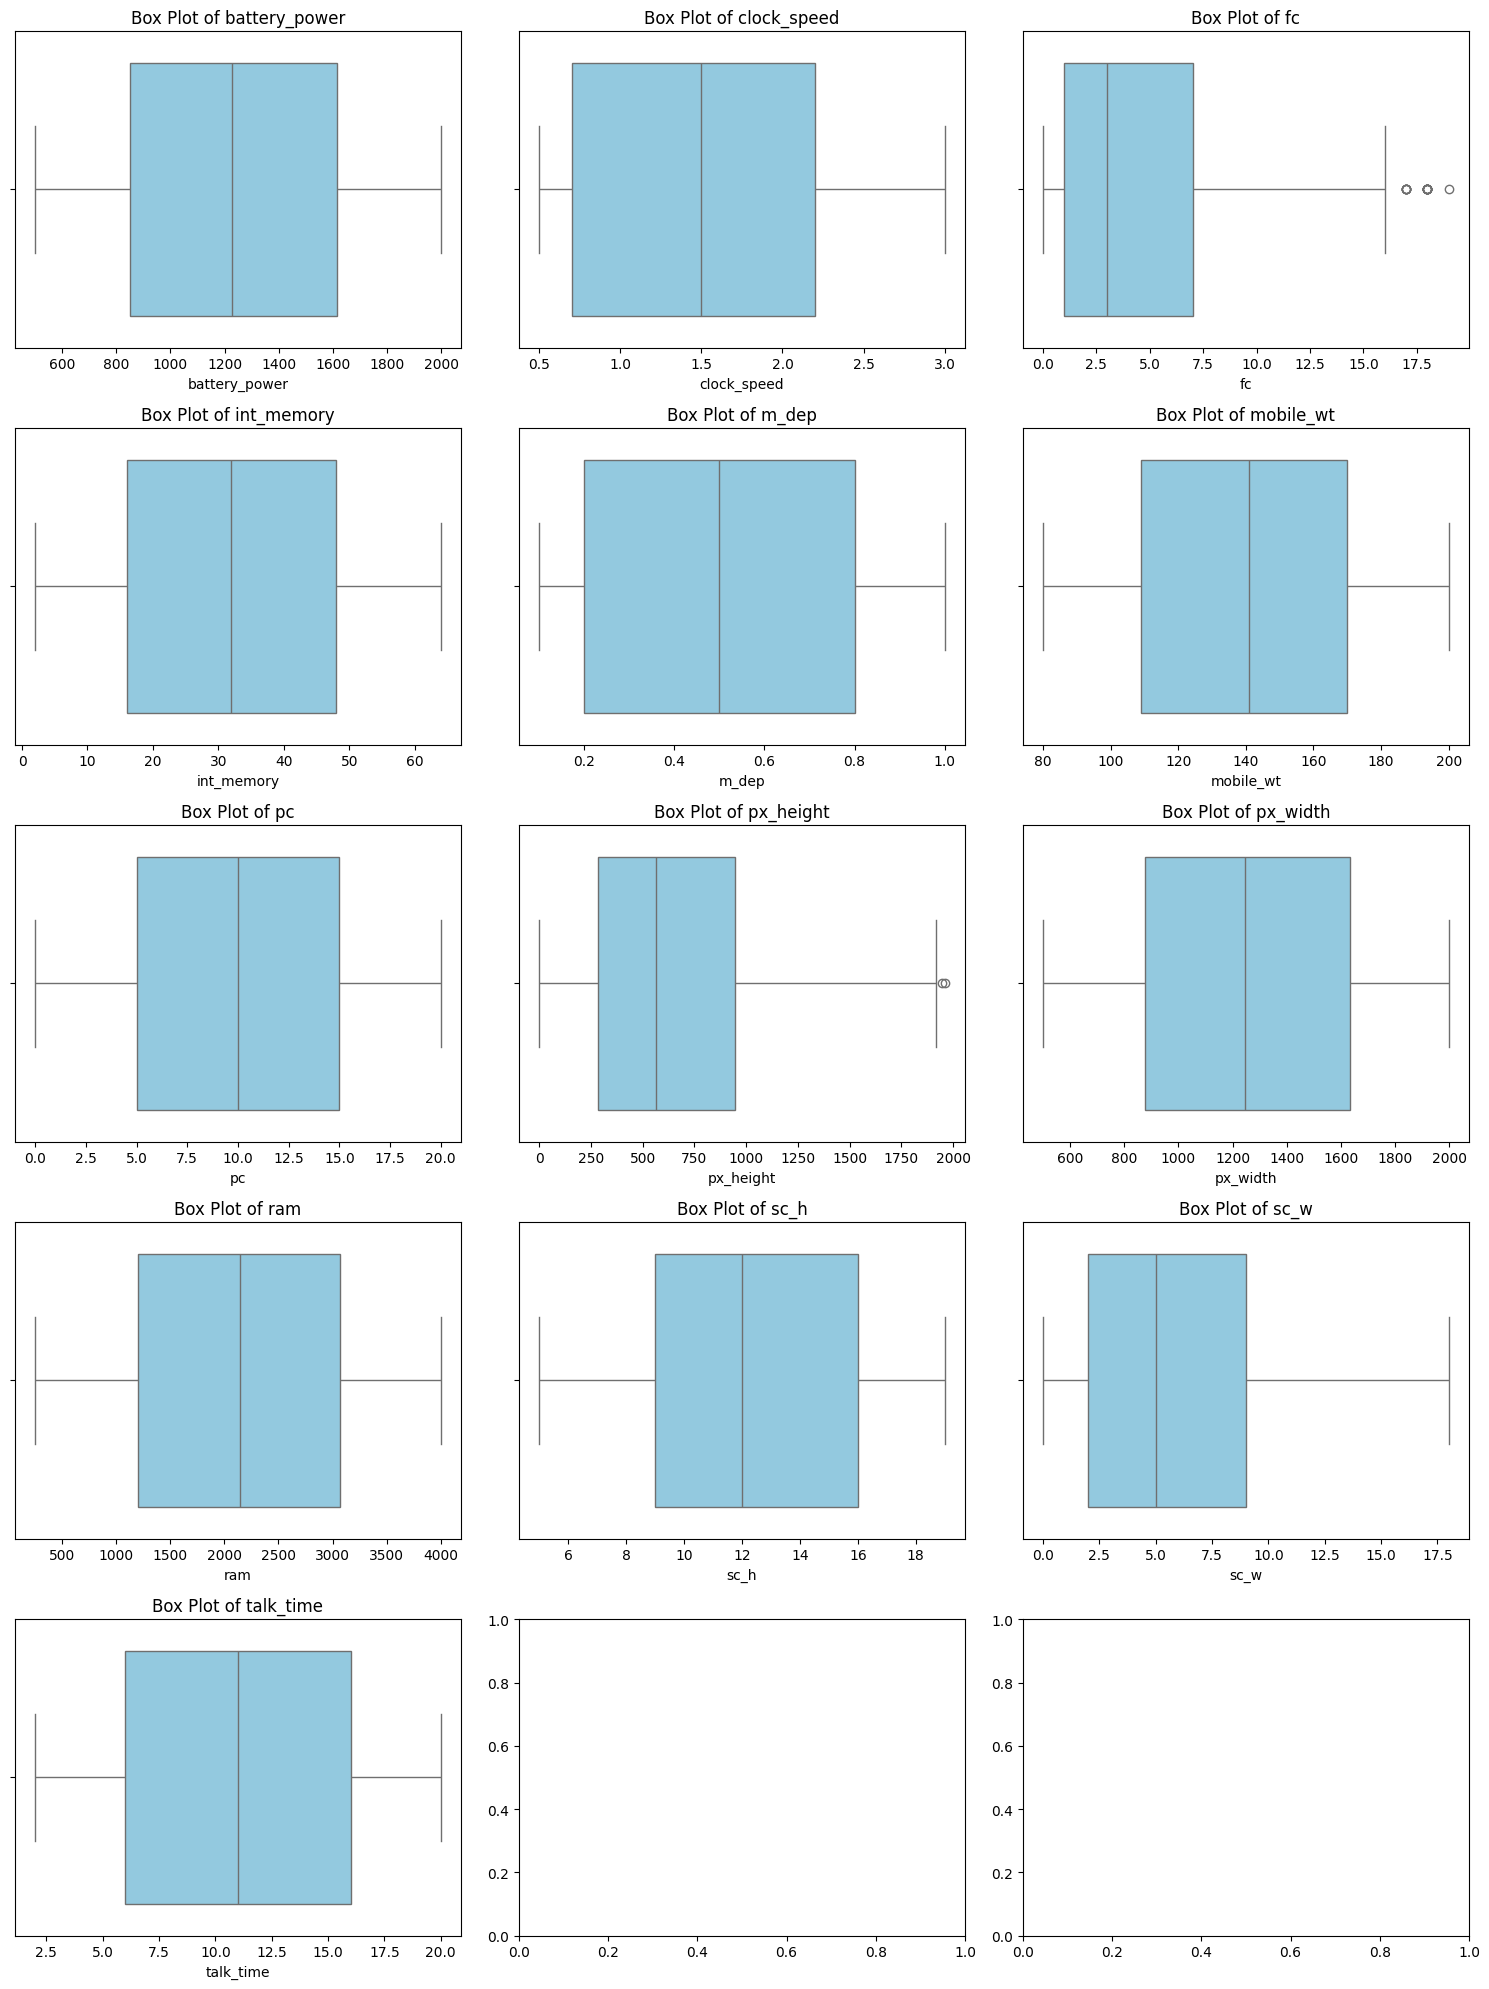

In [58]:
fig, axes = plt.subplots(5,3,figsize=(15,20))
axes = axes.flatten()

for i, features in enumerate(numerical_data.columns):
    histplot = sns.boxplot(x=numerical_data[features],ax=axes[i],color='skyblue')
    axes[i].set_title(f'Box Plot of {features}')

plt.tight_layout()
plt.show()

 **Conclusion**  
| S.No | Points |
|------|--------|
| 1    | Based on what we can see from KDE Plot and Box Plot, both `px_height` and `fc` have some kind of noise/outliers.|


## Data Clearning

In [ ]:
data.duplicated().sum() ## No duplicated data present in the dataset

0

<Axes: >

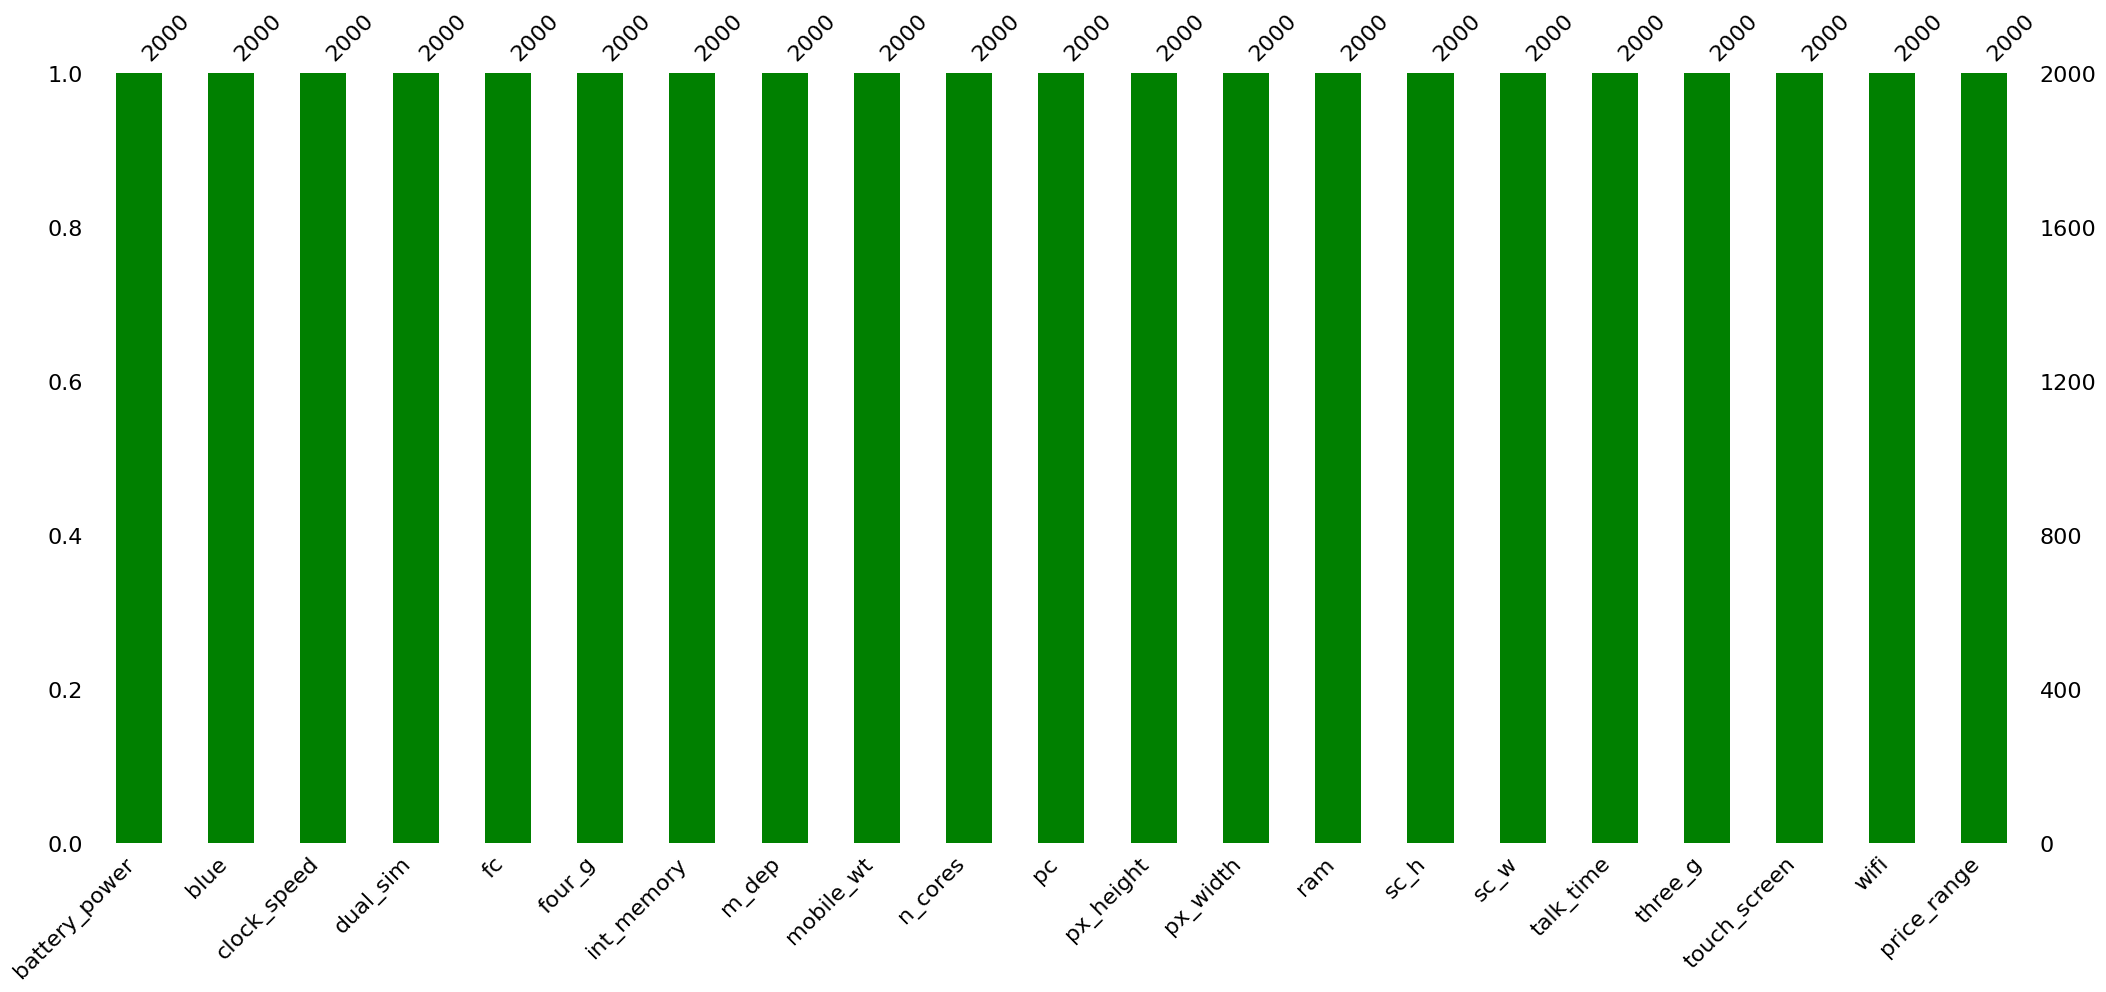

In [ ]:
msno.bar(data,color='green') ## No missing value in the dataset

## Feature Selection 

**Methods to be used:**
1. Pearson Correlation Feature Selection
2. Decision Tree or Random Forest Feature Selection

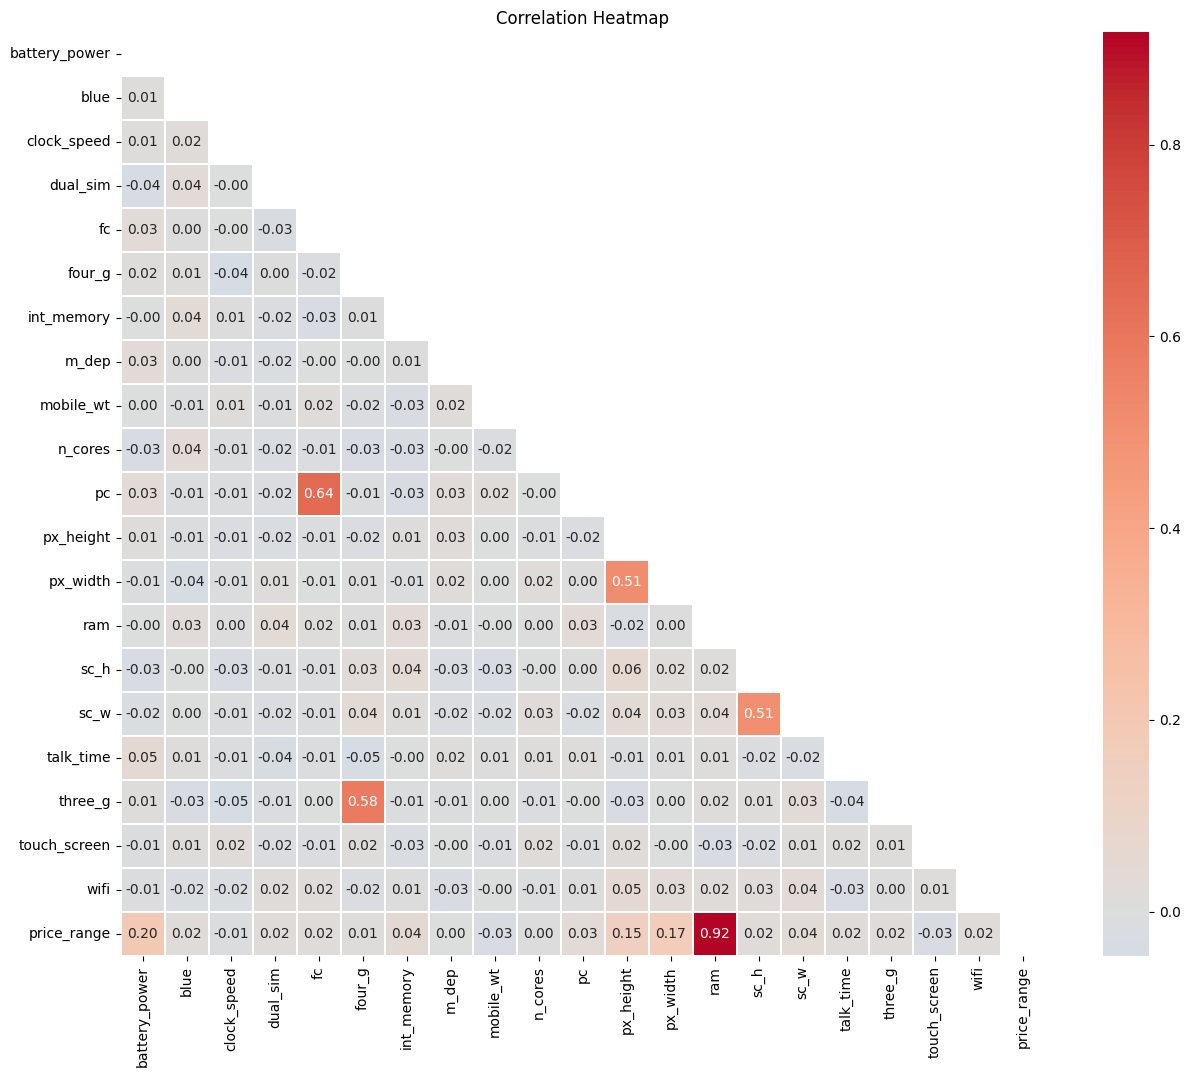

In [63]:
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  
plt.figure(figsize=(15, 12))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', linewidths=0.2, cmap='coolwarm', center=0, cbar=True, square=True)
plt.title("Correlation Heatmap")
plt.show()

 **Conclusions**  
| S.No | Points |
|------|--------|
| 1    | `price_range` is highly correlated with `ram`|
| 2    | Two variables `pc` and `fc` are highly correlated with each other.|


In [64]:
from sklearn.ensemble import RandomForestClassifier
x = data.drop('price_range',axis=1)
y = data['price_range']

rf = RandomForestClassifier(n_estimators=100,random_state=10)
rf.fit(x,y)

RandomForestClassifier(random_state=10)

In [65]:
feature_importance = pd.DataFrame({'Feature': x.columns, 'Importance': rf.feature_importances_})

In [67]:
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
13,ram,0.482140
0,battery_power,0.074727
11,px_height,0.057895
12,px_width,0.057458
6,int_memory,0.038345
8,mobile_wt,0.037120
16,talk_time,0.029643
15,sc_w,0.029145
10,pc,0.029040
2,clock_speed,0.027690


**Conclusions:**

The features with very low importance contribute little to the model.

Drop features with importance < 0.02, as they have minimal impact.
This means we should consider dropping:
- touch_screen
- dual_sim
- four_g
- wifi
- blue
- three_g

## splitting and scaling the data

In [68]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler

In [69]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=11,stratify=y)

In [73]:
print(f'Shape of Training Data:( x : {x_train.shape}, y : {y_train.shape[0]})')
print(f'Shape of Testing Data:( x : {x_test.shape}, y : {y_test.shape[0]})')

Shape of Training Data:( x : (1600, 20), y : 1600)
Shape of Testing Data:( x : (400, 20), y : 400)


In [74]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train = pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test = pd.DataFrame(x_test_scaled,columns=x_test.columns)

## Performing SVM Model

In [75]:
param_grid = {
    'C':[0.01,0.1,1,10,50,100],
    'kernel':['linear','rbf','poly'],
    'gamma':['scale','auto',0.01,0.1,1]
}

In [76]:
cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=12)

In [77]:
from sklearn.svm import SVC
svm = SVC(probability=True,random_state=13)
grid_search = GridSearchCV(svm,param_grid=param_grid,cv=cv,scoring='accuracy',n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ...................C=0.01, gamma=scale, kernel=poly; total time=   0.2s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.1s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.2s
[CV] END .................C=0.01, gamma=scale, kernel=linear; total time=   0.1s
[CV] END ...................C=0.01, gamma=scale, kernel=poly; total time=   0.2s
[CV] END ...................C=0.01, gamma=scale, kernel=poly; total time=   0.3s
[CV] END ..................C=0.01, gamma=auto, kernel=linear; total time=   0.2s
[CV] END ..................C=0.01, gamma=auto, kernel=linear; total time=   0.2s
[CV] END ...................C=0.01, gamma=scale, kernel=poly; total time=   0.3s
[CV] END ..................C=0.01, gamma=auto, 

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12, shuffle=True),
             estimator=SVC(probability=True, random_state=13), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 50, 100],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=2)

In [79]:
print("Best Parameters: ",grid_search.best_params_)

Best Parameters:  {'C': 50, 'gamma': 'scale', 'kernel': 'linear'}


In [80]:
from sklearn.metrics import accuracy_score

best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(x_test)

print("Test Accuracy",accuracy_score(y_test,y_pred))

Test Accuracy 0.975


In [83]:
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report\n")
print(classification_report(y_test,y_pred))

Classification Report

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       100
           1       0.98      0.96      0.97       100
           2       0.97      0.97      0.97       100
           3       0.98      0.98      0.98       100

    accuracy                           0.97       400
   macro avg       0.98      0.97      0.97       400
weighted avg       0.98      0.97      0.97       400



Text(0.5, 1.0, 'Confusion Matrix')

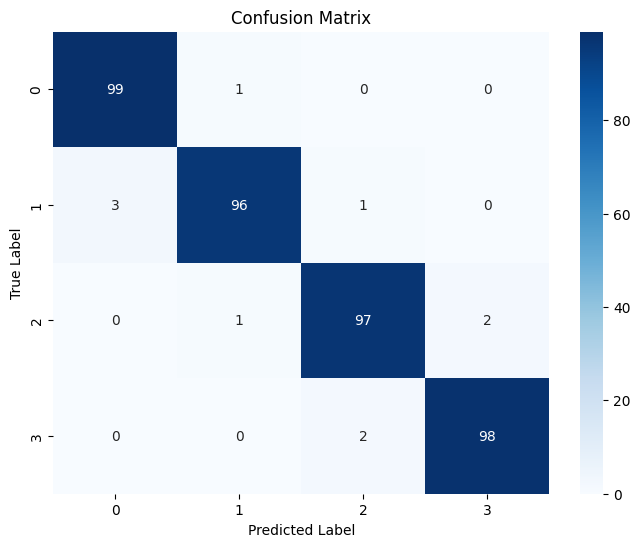

In [84]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test,y_pred),fmt='d',cmap='Blues',annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

## Random Forest Model

In [85]:
## Outlier Removal approach 
def remove_outliers(df,columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR 
    return df[df[columns]<= upper_bound]

data = remove_outliers(data,'px_height')
data = remove_outliers(data,'fc')

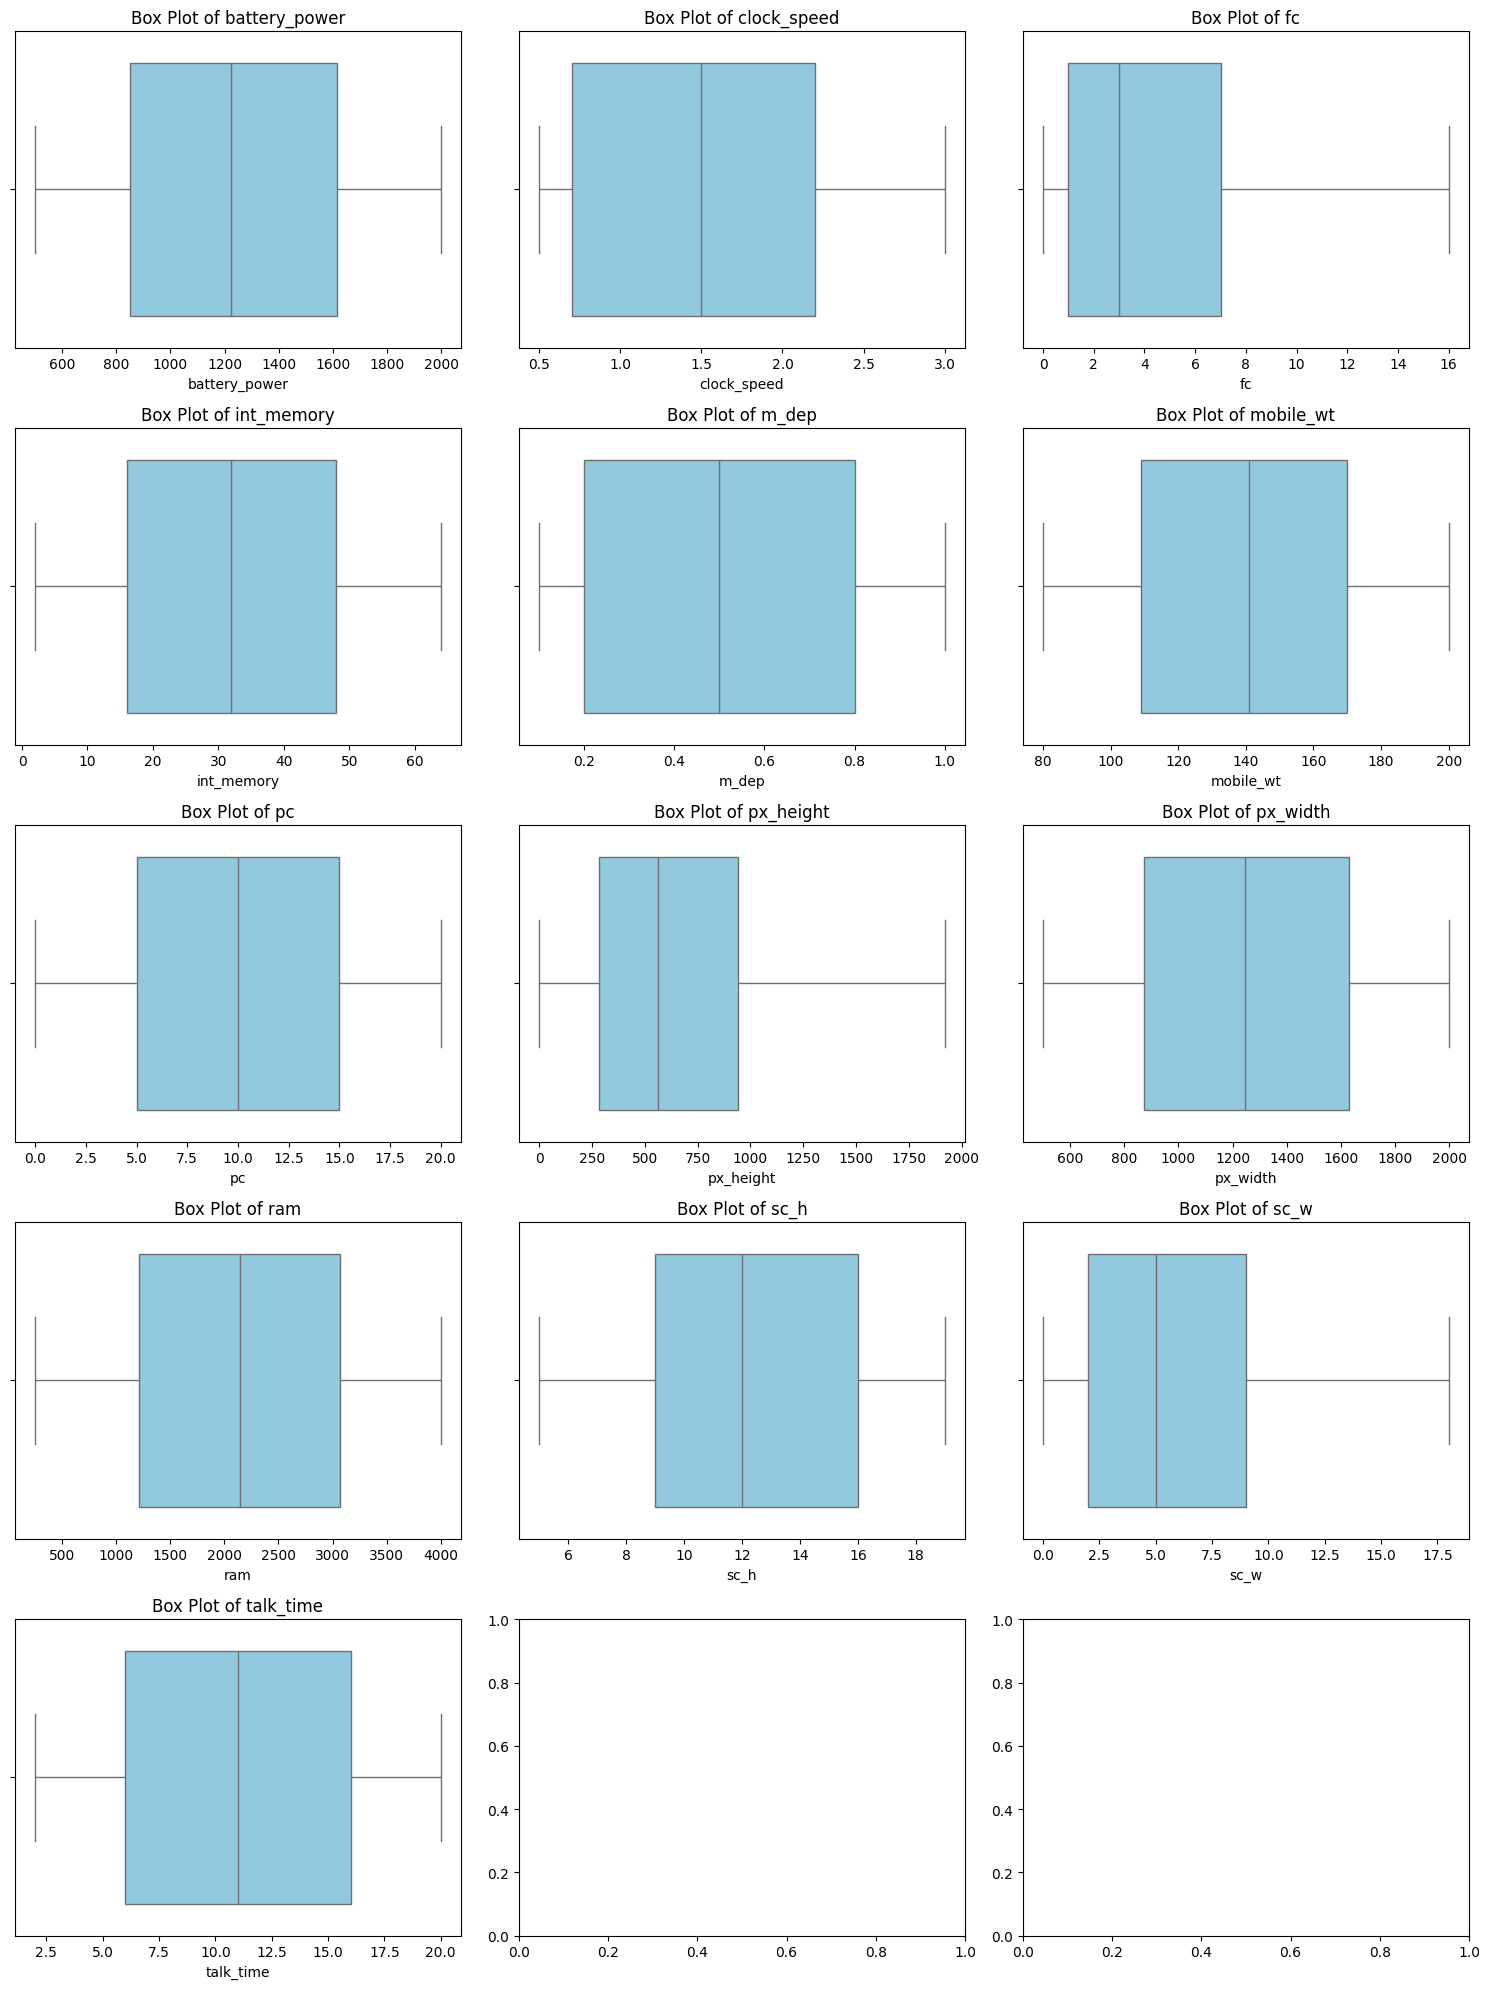

In [87]:
fig, axes = plt.subplots(5,3,figsize=(15,20))
axes = axes.flatten()

for i, features in enumerate(numerical_data.columns):
    histplot = sns.boxplot(x=data[features],ax=axes[i],color='skyblue')
    axes[i].set_title(f'Box Plot of {features}')

plt.tight_layout()
plt.show()

In [88]:
feature_importance

,Feature,Importance
13,ram,0.482140
0,battery_power,0.074727
11,px_height,0.057895
12,px_width,0.057458
6,int_memory,0.038345
8,mobile_wt,0.037120
16,talk_time,0.029643
15,sc_w,0.029145
10,pc,0.029040
2,clock_speed,0.027690


In [90]:
selected_features = feature_importance[feature_importance['Importance']>0.02]['Feature'].tolist()
selected_features

['ram',
 'battery_power',
 'px_height',
 'px_width',
 'int_memory',
 'mobile_wt',
 'talk_time',
 'sc_w',
 'pc',
 'clock_speed',
 'sc_h',
 'm_dep',
 'fc',
 'n_cores']

In [91]:
x = x[selected_features]

In [92]:
x

,ram,battery_power,px_height,px_width,int_memory,mobile_wt,talk_time,sc_w,pc,clock_speed,sc_h,m_dep,fc,n_cores
0,2549,842,20,756,7,188,19,7,2,2.2,9,0.6,1,2
1,2631,1021,905,1988,53,136,7,3,6,0.5,17,0.7,0,3
2,2603,563,1263,1716,41,145,9,2,6,0.5,11,0.9,2,5
3,2769,615,1216,1786,10,131,11,8,9,2.5,16,0.8,0,6
4,1411,1821,1208,1212,44,141,15,2,14,1.2,8,0.6,13,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,668,794,1222,1890,2,106,19,4,14,0.5,13,0.8,0,6
1996,2032,1965,915,1965,39,187,16,10,3,2.6,11,0.2,0,4
1997,3057,1911,868,1632,36,108,5,1,3,0.9,9,0.7,1,8
1998,869,1512,336,670,46,145,19,10,5,0.9,18,0.1,4,5


In [93]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [102]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=16,stratify=y)

param_grid = {
    'n_estimators':[70,100,120,150],
    'max_depth':np.arange(10,20),
    'min_samples_split':np.arange(2,5),
    'min_samples_leaf':np.arange(1,3)
}

In [103]:
rf = RandomForestClassifier(random_state=15)
grid_search = GridSearchCV(rf,param_grid,cv=cv,scoring='accuracy',n_jobs=-1,verbose=2)
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=70; total time=   0.1s

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, min_sampl

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=12, shuffle=True),
             estimator=RandomForestClassifier(random_state=15), n_jobs=-1,
             param_grid={'max_depth': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'min_samples_leaf': array([1, 2]),
                         'min_samples_split': array([2, 3, 4]),
                         'n_estimators': [70, 100, 120, 150]},
             scoring='accuracy', verbose=2)

In [104]:
print("Best Parameters: ",grid_search.best_params_)

Best Parameters:  {'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}


In [107]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Test Accuracy",accuracy_score(y_test,y_pred))

Test Accuracy 0.8625


In [108]:
print("Classification Report: \n")
print(classification_report(y_test,y_pred))

Classification Report: 

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       100
           1       0.79      0.89      0.84       100
           2       0.82      0.75      0.78       100
           3       0.91      0.88      0.89       100

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400



Text(0.5, 1.0, 'Random Forest Confusion Matrix')

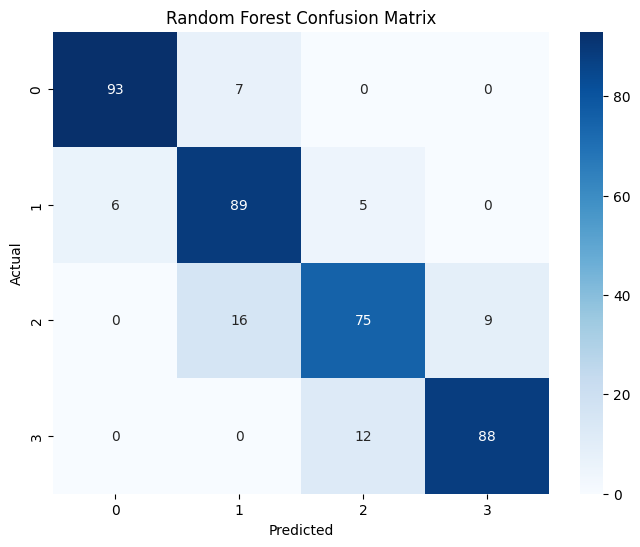

In [109]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')

## Final Result 

 SVM has much higher accuracy than Random Forest Classifier.

In [111]:
import pickle 
with open('best_svm.pkl','wb') as model_file:
    pickle.dump(best_svm,model_file)

with open('scaler.pkl','wb') as scaler_file:
    pickle.dump(scaler,scaler_file)